In [1]:
import sys  
sys.path.insert(0, '')

import loadnormalpddata
import searchandinvoke

In [2]:
output_memery={}
servicelist=[]
workflow = ['loadnormalpddata','spliting','pipelinemodels','featuremodelevaluation']

In [3]:
k=searchandinvoke.transforming_mutation(workflow[0],['pkson.csv'],servicelist,output_memery)
for si in workflow[1:]:
    print('servicename:', si)
    k=searchandinvoke.transforming_mutation(si,[k[0]],servicelist,k[2])
    servicelist.append(k[1])

1 1
Successfully imported loadnormalpddata microservice.
servicename: spliting
1 1
Successfully imported spliting microservice.
servicename: pipelinemodels
find_match_paramenter---
Successfully imported pipelinemodels microservice.
servicename: featuremodelevaluation
find_match_paramenter---
...continue searching solution...
wow! find combination output -> input service name is: featuremodelevaluation
Successfully imported featuremodelevaluation microservice.


In [4]:
k[0]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001528FF24190>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                              

In [12]:
k[2]

{'datafile.pandas':      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
 0        119.992       157.302        74.997         0.00784   
 1        122.400       148.650       113.819         0.00968   
 2        116.682       131.111       111.555         0.01050   
 3        116.676       137.871       111.366         0.00997   
 4        116.014       141.781       110.655         0.01284   
 ..           ...           ...           ...             ...   
 190      174.188       230.978        94.261         0.00459   
 191      209.516       253.017        89.488         0.00564   
 192      174.688       240.005        74.287         0.01360   
 193      198.764       396.961        74.904         0.00740   
 194      214.289       260.277        77.973         0.00567   
 
      MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
 0             0.00007   0.00370   0.00554     0.01109       0.04374   
 1             0.00008   0.00465   0.00696     0.01394 

In [16]:
k=searchandinvoke.transforming_mutation('spliting',[k[0]],servicelist,k[2])
servicelist.append(k[1])

1 1
Successfully imported spliting microservice.


In [17]:
k=searchandinvoke.transforming_mutation('pipelinemodels',[k[0]],servicelist,k[2])
servicelist.append(k[1])

find_match_paramenter---
Successfully imported pipelinemodels microservice.


In [18]:
k=searchandinvoke.transforming_mutation('featuremodelevaluation',[k[0]],servicelist,k[2])
servicelist.append(k[1])

find_match_paramenter---
...continue searching solution...
wow! find combination output -> input


ModuleNotFoundError: No module named 'n'

In [4]:
input_semantic = searchandinvoke.input_semantic_matching('pipelinemodels')

In [5]:
input_semantic

['datafile', 'split', '#X_train#']

In [6]:
output_semantic = searchandinvoke.output_semantic_matching('spliting')


        PREFIX ns1: <http://aimicroservice.derby.ac.uk/>
        
        SELECT ?c ?d ?isp
        WHERE {ns1:spliting ns1:output ?out . ?out ns1:paramter ?op . ?op ns1:pid ?uid . {?op ns1:iocategory ?c . ?op ns1:iodatatype ?d . ?op ns1:ioshape ?isp} UNION {?op ns1:iocategory ?c . ?op ns1:iodatatype ?d .} UNION {?op ns1:iocategory ?c .}}
datafile []
split ['datafile']
#X_train, X_test, y_train, y_test# ['datafile', 'split']


In [7]:
output_semantic

['datafile', 'split', '#X_train, X_test, y_train, y_test#']

In [8]:
match = searchandinvoke.find_match_parameter(input_semantic,output_semantic)

In [9]:
match

[[0, 0]]

In [2]:
from inspect import getmembers, isfunction
print(getmembers(searchandinvoke, isfunction))

[('searchandinvoke', <function searchandinvoke at 0x0000014A1DD9CF70>)]


In [6]:
stest1 = 'test#test#'
stest2 = '#test,aha#'

In [7]:
len(stest1.split('#')[-2].split(','))

1

In [21]:
stest2.split('#')[-2].split('.')

['test', 'aha']

In [2]:
import sys  
sys.path.insert(0, '')

import annDataCreation as adc
import genQualityControl as gqc
import genNormalisation as gnl
import genDimReduce as gdr
import genClustering as gct

In [3]:
adc.function('datasets/singlecell-rnaseq-data-from-mouse-brain/brain_counts.csv,datasets/singlecell-rnaseq-data-from-mouse-brain/brain_metadata.csv')

C:\Users\301054\Documents\Research\publication plan 2022-2023\ontologymachinelearningaiservices\implementation\demo example\annDataCreation.py:13: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(X = count_dataframe, obs = metadata_dataframe)


'results/brain_raw.h5ad'

C:\Users\301054\Anaconda3\envs\AIMicroServices\lib\site-packages\scanpy\preprocessing\_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


'results/brain_qc.h5ad'

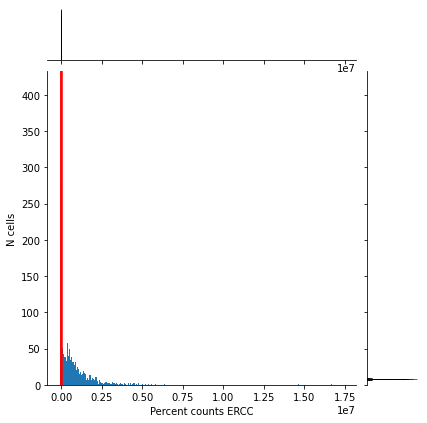

In [4]:
gqc.function('results/brain_raw.h5ad')

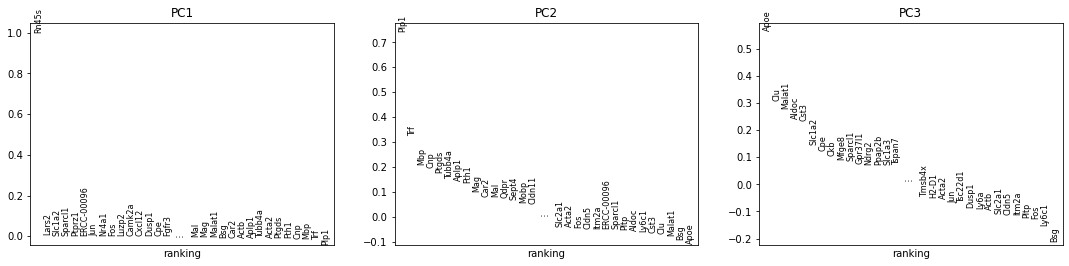

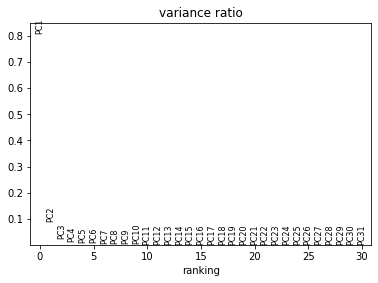

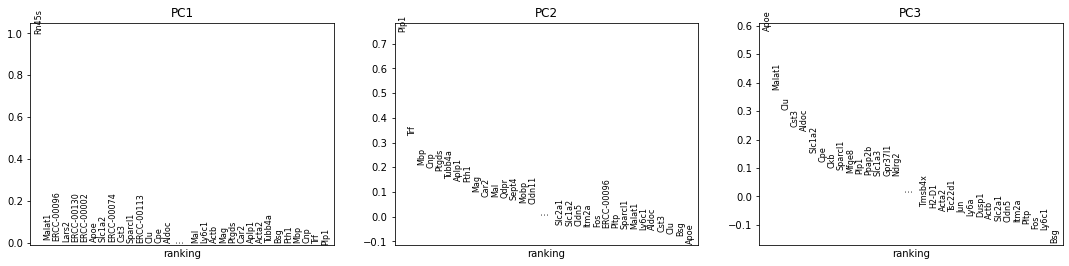

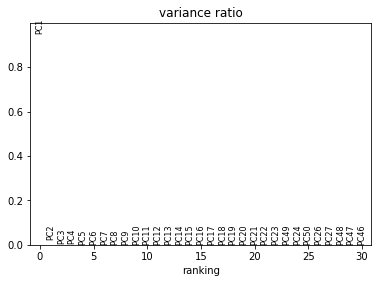

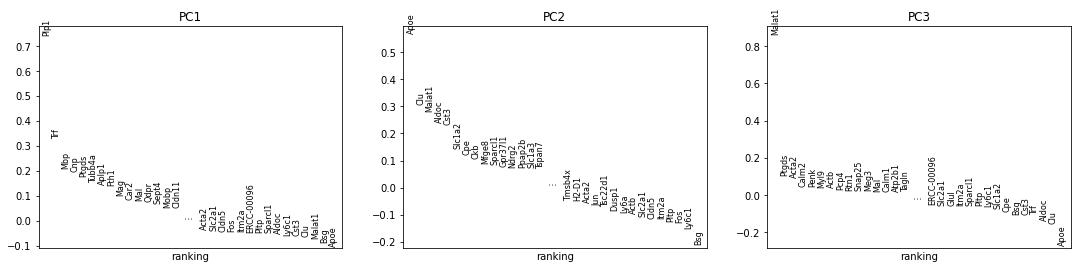

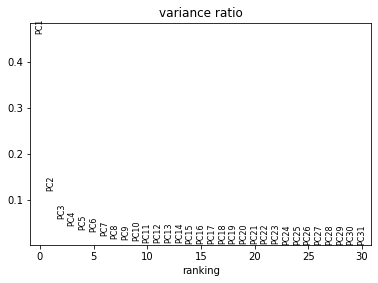

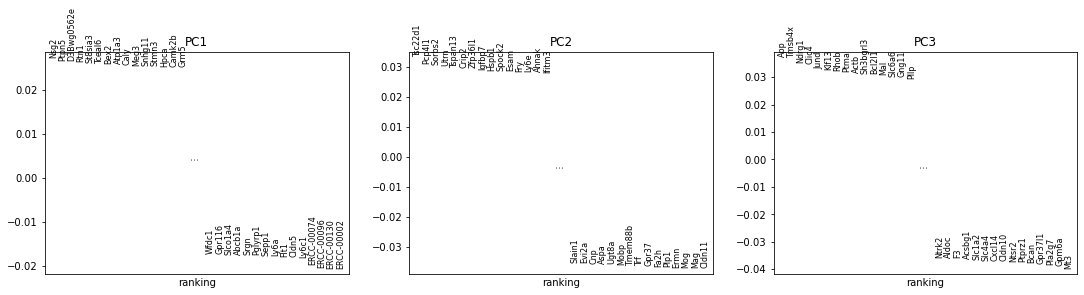

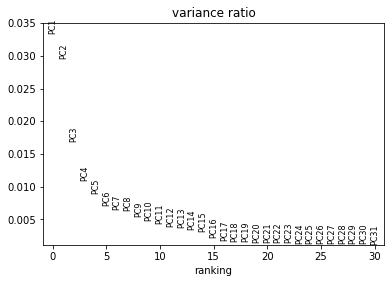

'results/brain_normalized.h5ad'

In [5]:
gnl.function('results/brain_qc.h5ad')

C:\Users\301054\Anaconda3\envs\AIMicroServices\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


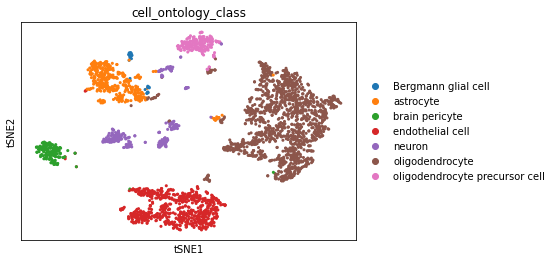

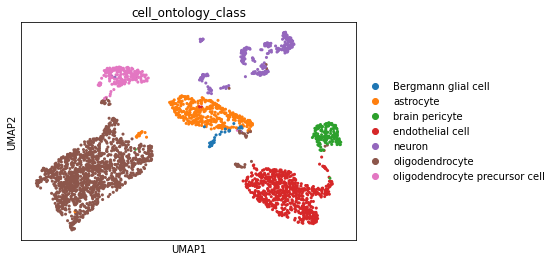

'results/brain_embeddings.h5ad'

In [6]:
gdr.function('results/brain_normalized.h5ad')
    

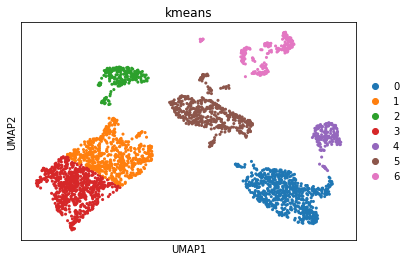

'results/brain_clusters.h5ad'

In [7]:
gct.function('results/brain_embeddings.h5ad')